In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# convert to binary
def convert_to_binary(data):
    if(type(data) == str):
        return ''.join([format(ord(c), "08b") for c in data])
    if(type(data) == bytes or type(data) == np.ndarray):
        return [format(i, "08b") for i in data]
    if(type(data) == int or type(data) == np.uint8):
        return format(data, "08b")
    raise TypeError("undefined error")

In [3]:
# function to hide data
def hide_data(img, msg):
    # to get the no of bytes in image
    no_of_bytes_img = img.shape[0] * img.shape[1] * 3 // 8

    #check if no of bytes of images is less than no of by of msg
    if(len(msg) > no_of_bytes_img):
        raise ValueError("number of bytes of images is less than number of bytes in message")
    
    # add delimter to end of message
    msg += "##"
    binary_msg = convert_to_binary(msg)
    data_index = 0
    data_len = len(binary_msg)

    # loop throw the image and put the binray msg in LSB
    for values in img:
        is_equal = False
        for pixels in values:
            # convert RGB values into binary
            r, g, b = convert_to_binary(pixels)
            # modify LSB if it still bytes in msg
            if data_index < data_len:
                # hide the data into LSB with red
                pixels[0] = int(r[:-1] + binary_msg[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # hide the data into LSB with green
                pixels[1] = int(g[:-1] + binary_msg[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # hide the data into LSB with blue
                pixels[2] = int(b[:-1] + binary_msg[data_index], 2)
                data_index += 1
            if data_index >= data_len:
                is_equal = True
        if is_equal:
            break
    return img

In [4]:
# function to show data which is hidded in image
def get_data(img):
    binary_data = ""
    for values in img:
        for pixels in values:
            r, g, b = convert_to_binary(pixels)
            #get the data from LSB in RGB
            binary_data += r[-1]
            binary_data += g[-1]
            binary_data += b[-1]

        # split data into 8 bit to convert it
        all_bytes = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
        decoded_data = ""
        for byte in all_bytes:
            decoded_data += chr(int(byte, 2))
            if decoded_data[-2:] == "##":
                break
        return decoded_data[:-2] # remove delimter

In [5]:
# encode text into an image with hide functon
def encode_text():
    img_name = input("enter the name and the path of the image (with extension): ")
    img = cv2.imread(img_name)
    # we will resize the image
    resized_img = cv2.resize(img, (500, 500))
    print("the original image..")
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    # cv2.imshow("Image", img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # take input text from usr to hide
    data = input("enter the data to hide: ")
    if len(data) == 0:
        raise ValueError("data is empty")
    new_img_name = input("enter the name and the path of image that will be encoded: ")
    encoded_img = hide_data(img, data)
    cv2.imwrite(new_img_name, encoded_img)

In [6]:
# decode function with get_data function
def decode_text():
    img_name = input("enter the name and the path of the image that encoded: ")
    img = cv2.imread(img_name)
    resized_img = cv2.resize(img, (500, 500))
    print("the stegnoraphic image..")
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    # cv2.imshow("Image", img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    text = get_data(img)
    return text

In [7]:
# main function
def main():
    user_input = input("Image Stegnography \n 1- Encode the Image \n 2- Decode the Image \n Your Input: ")
    if(user_input == "1"):
        print("\nEncoding..")
        encode_text()
    elif(user_input == "2"):
        print("\nDecoding..")
        print(f"the text you hide: {decode_text()}")
    else:
        raise Exception("enter a correct input")


Encoding..
the original image..


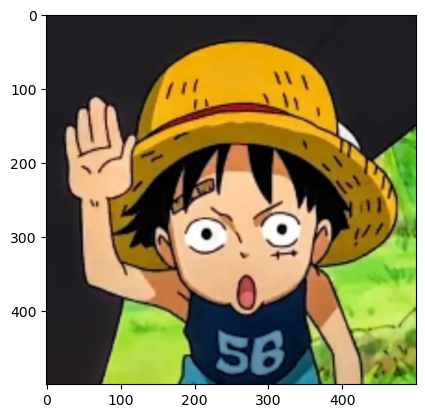

In [8]:
# START
if __name__ == "__main__":
    main()